# **MULTIPLE LINEAR REGRESSION**


Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Dataset Description:
The dataset consists of the following variables:

Age: Age in years

KM: Accumulated Kilometers on odometer

FuelType: Fuel Type (Petrol, Diesel, CNG)

HP: Horse Power

Automatic: Automatic (Yes=1, No=0)

CC: Cylinder Volume in cubic centimeters

Doors: Number of doors

Weight: Weight in Kilograms

Quarterly_Tax:

Price: Offer Price in EUROs

Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.

Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?

Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.


### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


Check if there any Null Values

In [92]:
df.isnull().sum().sum()

0

Check for any Duplicate Values

In [93]:
df.duplicated().sum()

1

In [94]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


Eliminate the Duplicate Values

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.duplicated().sum()

0

In [97]:
df=df.rename({'Age_08_04':'Age'},axis=1)

Visulization

Histogram plot

In [98]:
for col in df.select_dtypes(include=np.number).columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Distribution of {col}')
    fig.update_layout(xaxis_title=col, yaxis_title='Frequency')
    fig.show()

Barplot

<Axes: xlabel='Fuel_Type', ylabel='Price'>

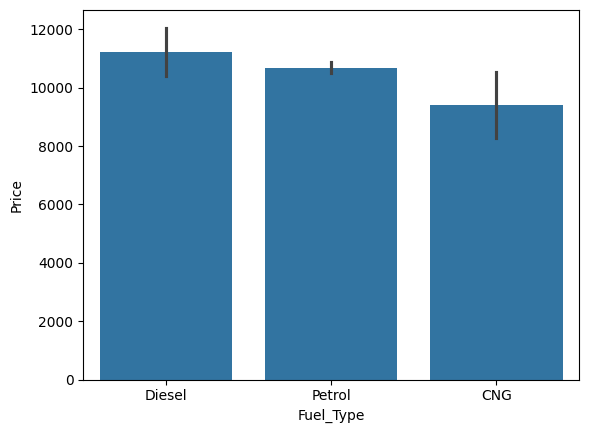

In [99]:
sns.barplot(x='Fuel_Type', y='Price', data=df)

Pairplot

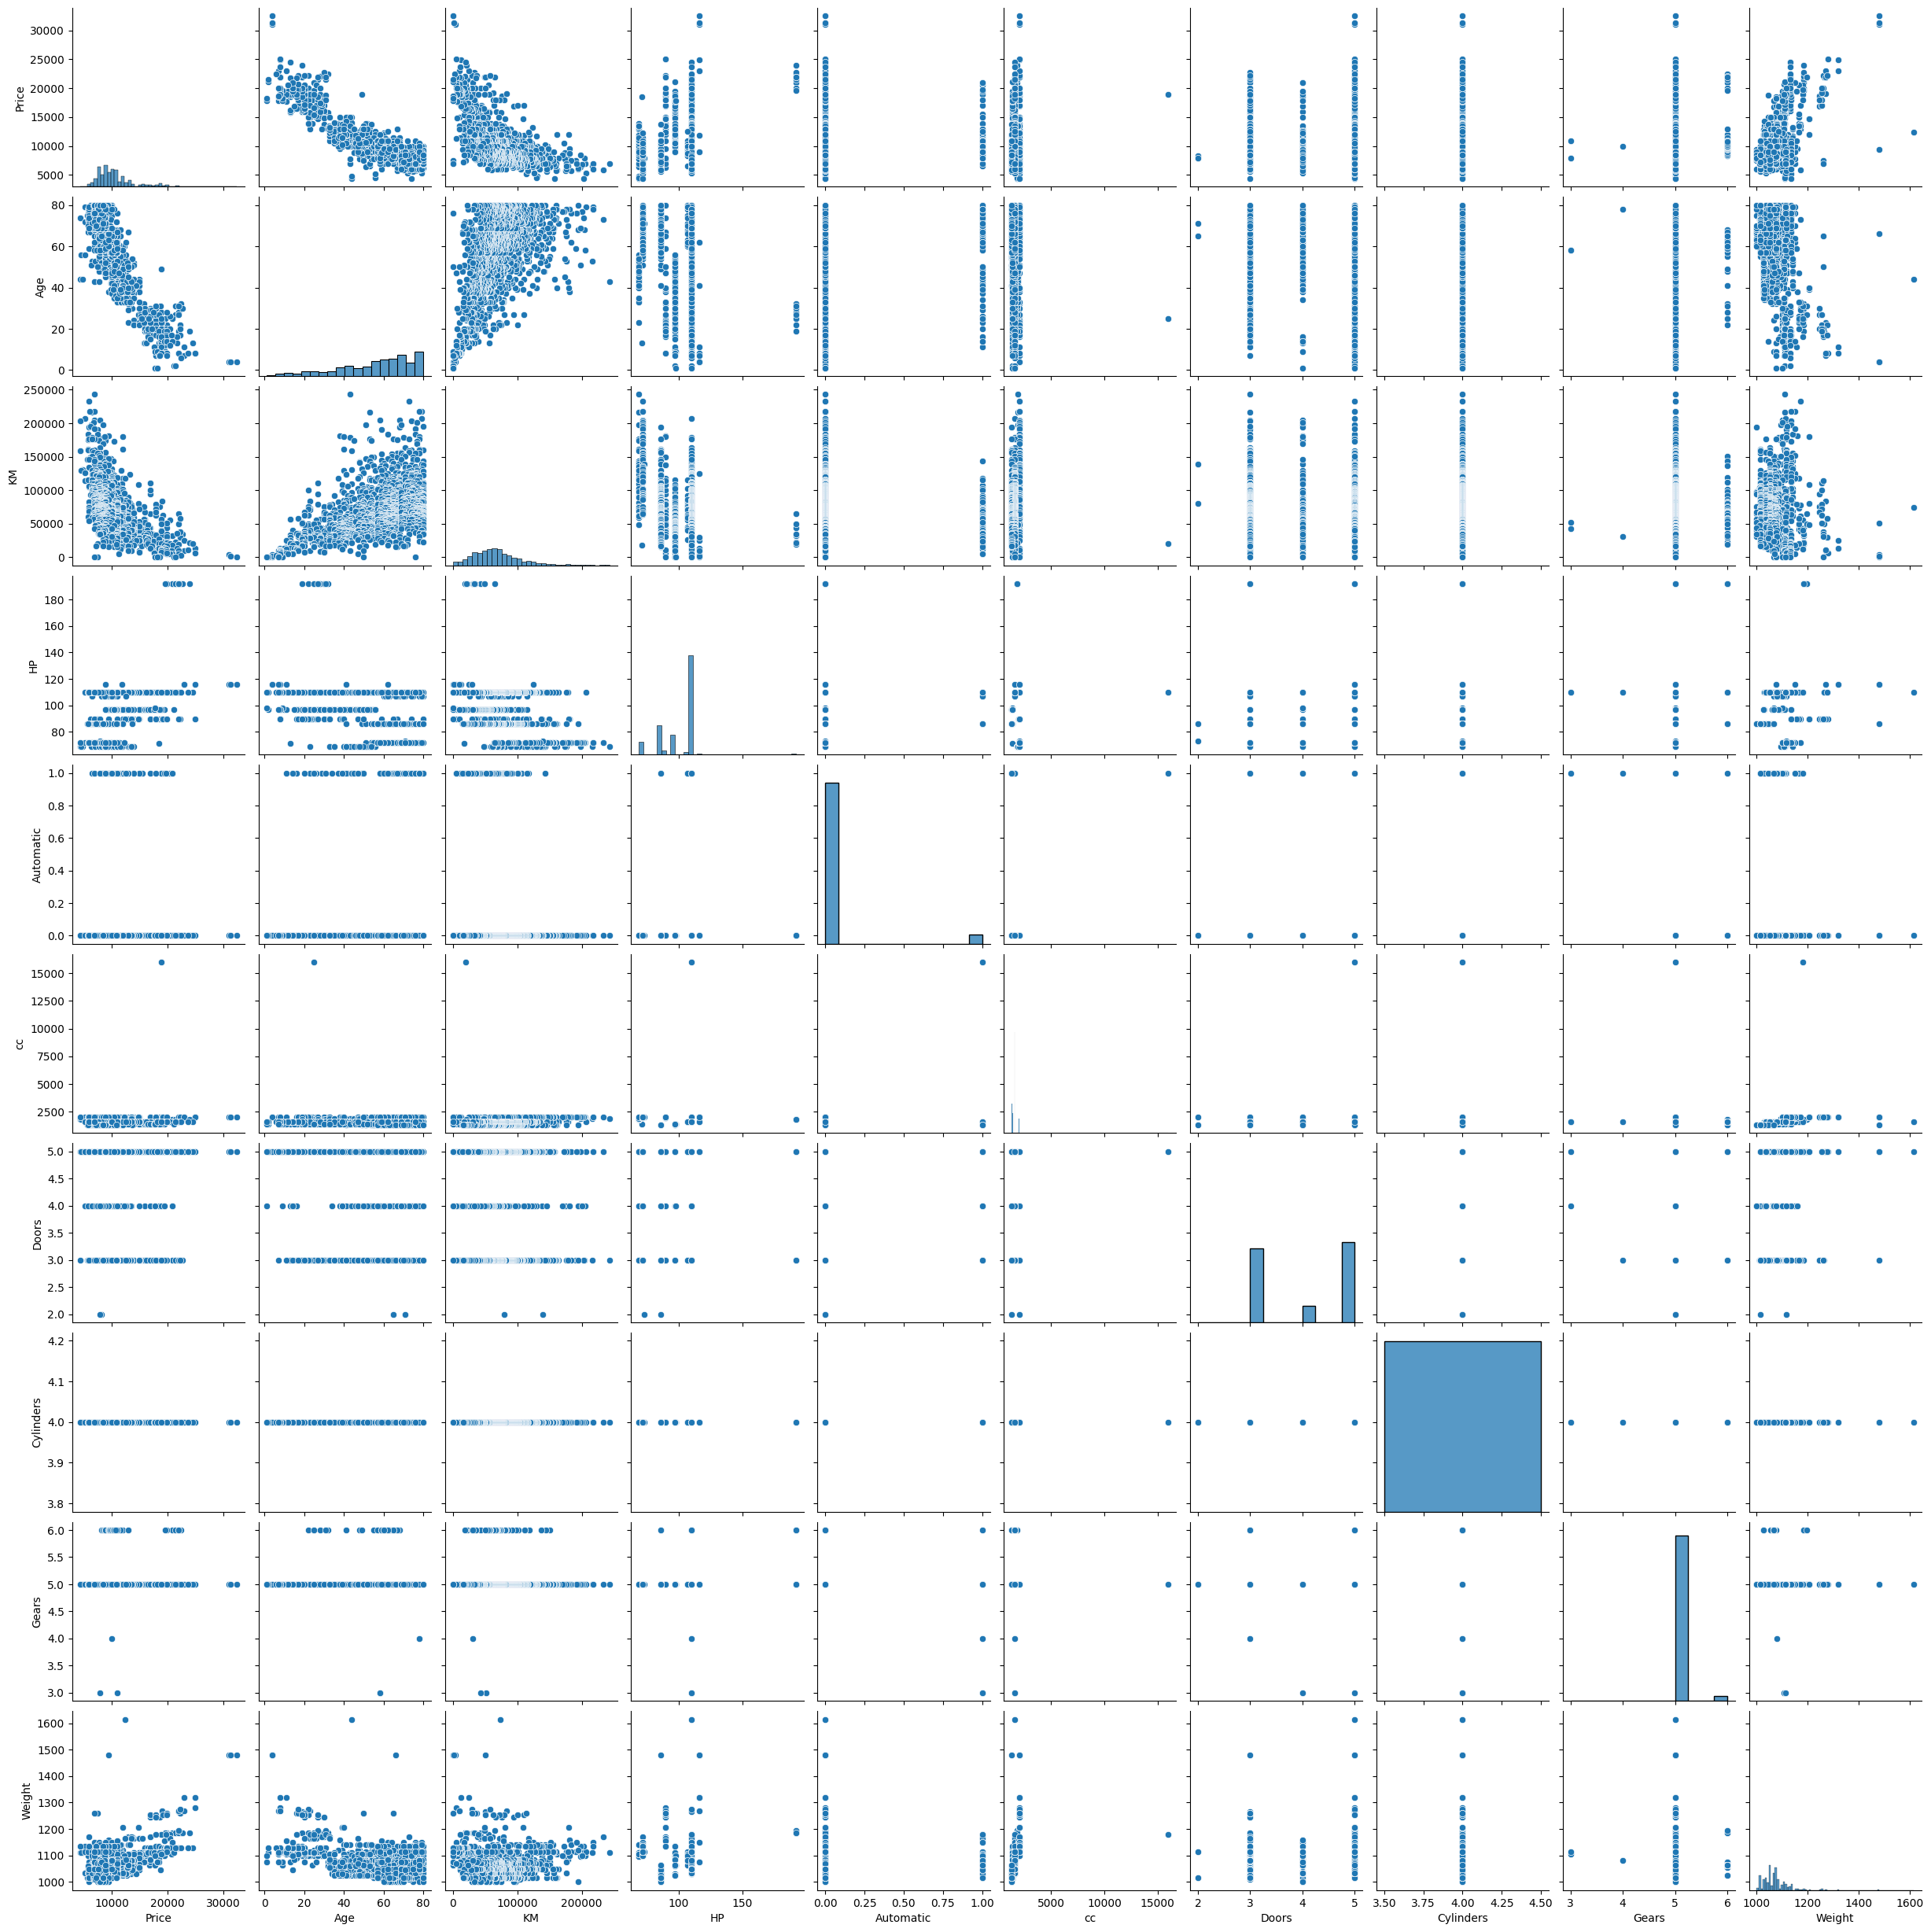

In [100]:
sns.pairplot(df)

In [101]:
df.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

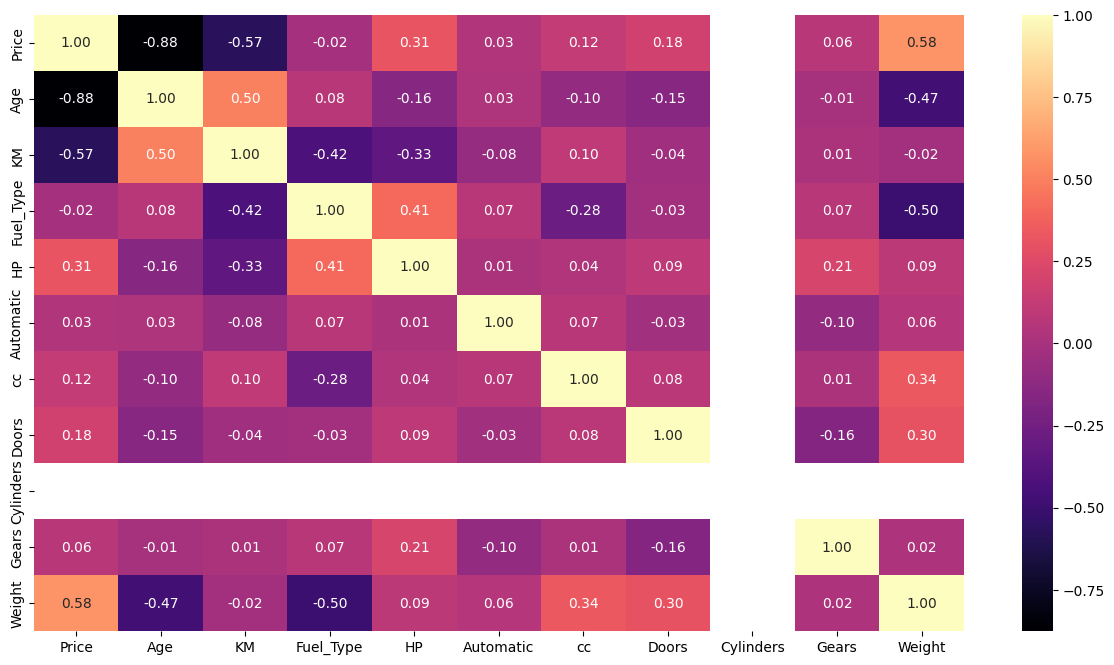

In [103]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".2f")   #Heatmap fmt=".no. of decimals"
plt.show()

### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [104]:
x = df.drop('Price', axis=1)
y =  df['Price']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [105]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((1148, 10), (287, 10), (1148,), (287,))

### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

**LinearRegression**

Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.

In [106]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [107]:
y_pred = lr.predict(X_test)
y_pred

array([10771.2771743 , 10336.13685636,  9300.14645287,  9383.27822615,
        8435.76785895,  8445.30068545,  7936.52725684,  8286.94272138,
       11767.14335883, 12375.17502016,  9479.95897656,  9353.10818538,
       13188.73160423, 12233.66757083,  8967.21646198, 11552.49130967,
       12313.21744619, 17508.98900451,  9955.97624331, 11465.13575011,
       11490.36200939, 18077.25831313,  9819.07059707, 10397.12949576,
        7419.22646204, 16012.96400703,  7106.33604153,  8333.42756975,
       15617.83563246, 13859.06122019,  8182.55429566, 10474.07520907,
       10113.64693143, 10140.65103679, 10035.58555088,  8641.96418298,
        8828.64778893, 10006.4081339 , 16328.91829034, 10681.62924074,
        8767.35122328,  9543.94520414, 10172.74049349,  8543.02605237,
       10585.06079855, 17603.67456708, 10440.81994029,  9228.6621402 ,
       10687.78430641, 12510.29417278, 12854.76621102,  6285.62577759,
       14905.09873082, 16323.27129081,  6059.43754006,  7788.36653087,
      

In [108]:
lr.score(X_test,y_test)

0.832747199599305

.score() for regression models gives the R-squared (R²) value.
r2_score() directly calculates R-squared from the true and predicted values.
They are functionally the same when evaluating a regression model's performance.

**KNN**

KNN method is used for classification and regression tasks. It makes predictions based on the closest training samples in the feature space.

In [109]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [110]:
knn_pred = knn.predict(X_test)
knn_pred

array([ 9558. ,  9980. ,  6640. , 10278. , 10470. ,  8479. , 11860. ,
        9697. , 12020. , 12820. ,  8980. ,  9850. , 11070. , 13120. ,
       10610. , 13390. , 12669. ,  7697. , 11338. , 13630. , 11619. ,
       20868. ,  9540. , 13319.8,  8535. , 11679. ,  9320. ,  7770. ,
       15529. , 14250. ,  9520. ,  8939.8,  9050. ,  9198. , 12099. ,
        8540. ,  9948. ,  8750. , 11220. ,  9170. ,  7408. ,  9579. ,
        9759. ,  9210. , 10350. , 14820. , 13610. , 12740. ,  9250. ,
       14427. , 16069. , 10580. , 11040. , 18840. ,  8980. ,  8240. ,
       10750. ,  9860. , 15040. ,  9240. ,  9730. ,  8200. ,  8840. ,
        9760. , 10717. ,  8008. ,  9670. ,  8160. ,  8860. ,  9260. ,
       13008. ,  9140. , 16410. , 11124.8, 16478. , 10160. ,  8600. ,
        8980. , 10610. , 13219.8, 10250. , 10550. ,  9510. , 10159. ,
       12620. ,  7810. ,  9570. , 13044. ,  8550. ,  8470. ,  8740. ,
        7969. ,  9050. , 10560. ,  9759. ,  8738. , 19040. , 10300. ,
       14720. , 1201

In [111]:
knn.score(X_test,y_test)

0.4011131447114997

**SVM**

Support Vector Machine, is a popular supervised learning algorithm used for classification and regression analysis. It's particularly effective in handling high-dimensional datasets and non-linearly separable data. SVM works by finding the best hyperplane that separates the classes in the input space, and can be used for both linear and non-linear classification.

In [112]:
from sklearn import svm
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [113]:
svr_pred = svr.predict(X_test)
svr_pred

array([ 9809.25364618,  9868.49683555,  9706.59517427,  9946.30741673,
        9933.09130548,  9833.36026494,  9977.95649006,  9897.10347647,
        9917.10401692,  9961.6831373 ,  9766.62650438,  9891.13763107,
        9931.99729634,  9988.94569784,  9916.16605311,  9950.80636264,
        9955.78341123,  9747.6552976 ,  9945.70639087,  9985.47841336,
        9934.71448862, 10000.59114788,  9940.09445533,  9957.20209774,
        9749.85427466,  9990.93747904,  9858.96592621,  9705.90469798,
        9980.1206181 ,  9981.32981277,  9792.48697006,  9872.06916571,
        9844.57863034,  9847.58474752,  9972.18667922,  9767.3085704 ,
        9810.49803468,  9844.75519859,  9977.75682534,  9914.23172531,
        9734.65530015,  9878.37317723,  9894.14242928,  9817.17281965,
        9923.10873854,  9965.02458642,  9981.45674574,  9954.99714767,
        9939.54852332,  9988.24490648,  9980.40849619,  9863.20491287,
        9897.75785777, 10000.20125696,  9710.31521614,  9713.06545665,
      

In [114]:
svr.score(X_test, y_test)

-0.02936950217673484

**DecsionTree**

A **decision tree** is a supervised learning algorithm used for classification and regression that splits data into subsets based on feature values, forming a tree-like structure of decisions. It is simple to interpret, but can be prone to overfitting without proper tuning (e.g., pruning).

In [115]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [116]:
dt_pred = dt.predict(X_test)
dt_pred

array([10450.,  9450.,  8950.,  6950.,  8750.,  9900.,  7900.,  8250.,
       12900.,  9900.,  9750.,  8950., 11950., 11500.,  9450., 11250.,
       11895., 16900., 10950.,  9950.,  9950., 18950.,  8950.,  9400.,
        8450., 18450.,  7250.,  7950., 14900., 11990.,  8500., 10950.,
        9250.,  8000.,  9750.,  8250., 10500.,  9950., 15950.,  9750.,
        9950., 10295.,  9750.,  7750., 10250., 21750., 10995.,  9950.,
        9750., 11500., 13450.,  8950., 15800., 17950.,  7750.,  9450.,
        9700., 10900., 19950., 21950., 10450.,  6900.,  8750., 10950.,
       12900.,  5950., 14950.,  6500.,  9950.,  7750., 21500., 10500.,
       11895.,  7499., 18500., 11925.,  7750.,  7900.,  7450.,  9950.,
        7400., 10950., 11500.,  9700.,  7000.,  8950.,  7900., 10950.,
        9250.,  8950.,  8250.,  9950.,  7500., 10995.,  9950., 10500.,
       19950., 10900., 11500.,  9950.,  9245.,  9500.,  9900., 15950.,
        8900.,  6900., 16900.,  7750., 11710.,  9900., 11450.,  4750.,
      

In [117]:
dt.score(X_test,y_test)

0.8102435400448665

### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [118]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

R-squared: 0.832747199599305
Mean Squared Error: 2006554.2201165322


In [119]:
# Calculate R-squared
r2_knn = r2_score(y_test, knn_pred)
print('R-squared for KNN:', r2_knn)

# Calculate Mean Squared Error
mse_knn = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error for KNN:', mse_knn)


R-squared for KNN: 0.4011131447114997
Mean Squared Error for KNN: 7184925.7170731705


In [120]:
# Calculate R-squared
r2_svr = r2_score(y_test, svr_pred)
print('R-squared for SVM:', r2_svr)

# Calculate Mean Squared Error
mse_svr = mean_squared_error(y_test, svr_pred)
print('Mean Squared Error for SVM:', mse_svr)


R-squared for SVM: -0.02936950217673484
Mean Squared Error for SVM: 12349483.618233029


In [121]:
# Calculate R-squared
r2_dt = r2_score(y_test, dt_pred)
print('R-squared for DT:', r2_dt)

# Calculate Mean Squared Error
mse_dt = mean_squared_error(y_test, dt_pred)
print('Mean Squared Error for DT:', mse_dt)


R-squared for DT: 0.8102435400448665
Mean Squared Error for DT: 2276533.6341463416


After observing all four models accuracy , we can say LinearRegression has better score compare to KNN , DVM and Decsion Tree
LinearRegression has 83% accuracy score , DescionTree with 81 % , KNN with 40% and SVM with -2%

### 5.Apply Lasso and Ridge methods on the model.

**Ridge Method**

L2 (Ridge): Best when all features are potentially useful and you want to reduce the variance of the model without eliminating any feature completely.

Cost function (Ridge)
=
Loss function+𝜆 ∑ 𝜃𝑗^2


In [122]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1) # alpha = penatly (lamda)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean squared error on test set ",mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


Mean squared error on test set  2004802.9270228094
     Columns  Coefficient Estimate
0        Age           -121.841188
1         KM             -0.016867
2  Fuel_Type            835.057130
3         HP             23.731363
4  Automatic            369.915566
5         cc             -0.097047
6      Doors            -60.355024
7  Cylinders              0.000000
8      Gears            433.997125
9     Weight             23.581646


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

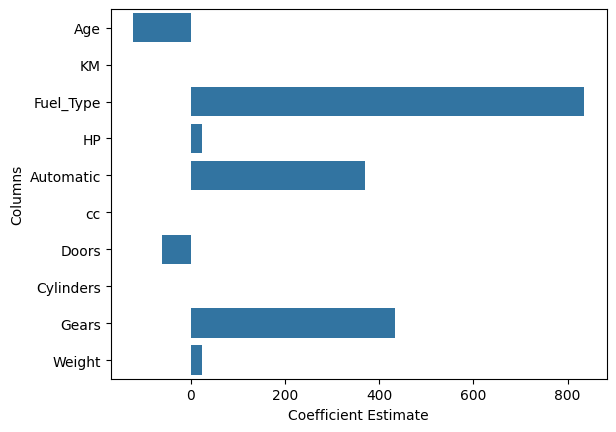

In [123]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

**Lasso Method**

L1 (Lasso): Best when you believe only a few features are useful, as it performs feature selection by shrinking irrelevant features' coefficients to zero.

Cost function (Lasso)=Loss function+ λ ∑ |𝜃𝑗|


In [124]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1) # alpha = penatly (lamda)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 2004392.04808103
     Columns  Coefficient Estimate
0        Age           -121.806688
1         KM             -0.016889
2  Fuel_Type            831.171849
3         HP             23.810809
4  Automatic            355.078484
5         cc             -0.096646
6      Doors            -59.973587
7  Cylinders              0.000000
8      Gears            412.073430
9     Weight             23.573062


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

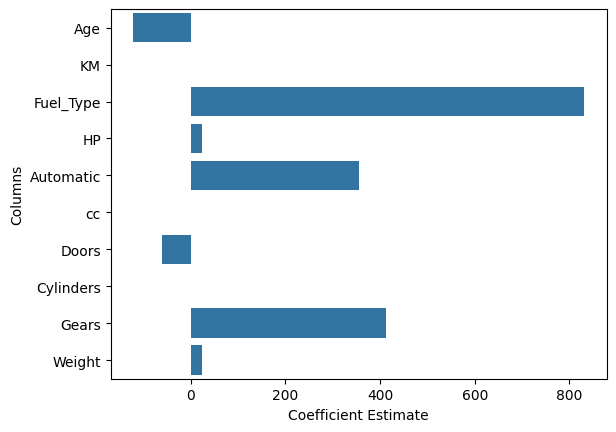

In [125]:
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

In [126]:
df = pd.DataFrame({'col_name':x.columns,'coef_linear_regresiion':lr.coef_,'coef_ridge':ridgeR.coef_,'coef_lasso':lasso.coef_})
df

,col_name,coef_linear_regresiion,coef_ridge,coef_lasso
0,Age,-1.218615e+02,-121.841188,-121.806688
1,KM,-1.682260e-02,-0.016867,-0.016889
2,Fuel_Type,8.478204e+02,835.057130,831.171849
3,HP,2.358678e+01,23.731363,23.810809
4,Automatic,3.754550e+02,369.915566,355.078484
5,cc,-9.664128e-02,-0.097047,-0.096646
6,Doors,-6.041094e+01,-60.355024,-59.973587
7,Cylinders,-2.273737e-13,0.000000,0.000000
8,Gears,4.480004e+02,433.997125,412.073430
9,Weight,2.362787e+01,23.581646,23.573062


### **Interview Questions:**

1.What is Normalization & Standardization and how is it helpful?


**1. Normalization & Standardization**

**Normalization** and **Standardization** are techniques used to rescale data, making it easier to compare and analyze.

#### Normalization
Normalization rescales the data to a fixed range, typically [0, 1] or [-1, 1]. This is useful when you want to ensure that all features contribute equally to the analysis, especially when they are measured on different scales.

**Formula:**
$$
x_{\text{new}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

**Example:**
If you have a dataset with values ranging from 10 to 100, and you want to normalize it to [0, 1]:
- For a value of 20:
  $$
  x_{\text{new}} = \frac{20 - 10}{100 - 10} = \frac{10}{90} \approx 0.11
  $$

#### Standardization
Standardization rescales the data to have a mean of 0 and a standard deviation of 1. This is useful when you want to compare data that follows a normal distribution.

**Formula:**
$$
x_{\text{new}} = \frac{x - \mu}{\sigma}
$$
where \( \mu \) is the mean and \( \sigma \) is the standard deviation.

**Example:**
If you have a dataset with a mean of 50 and a standard deviation of 10:
- For a value of 70:
  $$
  x_{\text{new}} = \frac{70 - 50}{10} = 2
  $$


2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to isolate the effect of each variable.


**Techniques to Address Multicollinearity**:

1. **Remove Highly Correlated Variables:**
   - Identify and remove one of the correlated variables.
   - **Example:** If `height` and `shoe size` are highly correlated, you might remove `shoe size` from the model.

2. **Combine Variables:**
   - Combine correlated variables into a single variable.
   - **Example:** If `height` and `weight` are correlated, you could create a new variable like `BMI` (Body Mass Index).

3. **Principal Component Analysis (PCA):**
   - Transform the correlated variables into a set of linearly uncorrelated variables called principal components.
   - **Example:** Use PCA to reduce the dimensionality of the dataset while retaining most of the variance.

4. **Regularization Techniques:**
   - Apply techniques like Ridge Regression or Lasso Regression that add a penalty to the regression model to reduce the impact of multicollinearity.
   - **Example:** Ridge Regression adds a penalty equal to the square of the magnitude of coefficients, which helps in reducing their variance

